<a href="https://colab.research.google.com/github/primalbioinformatics/druginformatics-2025/blob/main/molecule_graph_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Condacolab to enable conda installation in Colab
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [1]:
# Install RDKit from conda-forge along with other dependencies
!conda install -c conda-forge rdkit -y
!pip install networkx matplotlib

Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hb9d3cd8_2          19 KB  conda-forge
    brotli-bin-1.1.0           |       hb9d3cd8_2          18 KB  conda-forge
    ca-certificates-2025.1.31  |       hbcca054_0         154 KB  conda-forge
    cairo-1.18.2               |       h3394656_1         956 KB  conda-forge
    chardet-5.2.0              |  py311h38be061_2         259 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    contourpy-1.3.1            |  py311hd18a35c_0         272 KB  conda-forge
    cycler-0.12.1              |     pyhd8ed1ab_1          13 KB  conda-forge
    cyrus-sasl-2.1.27          |       h54b06d7_7 

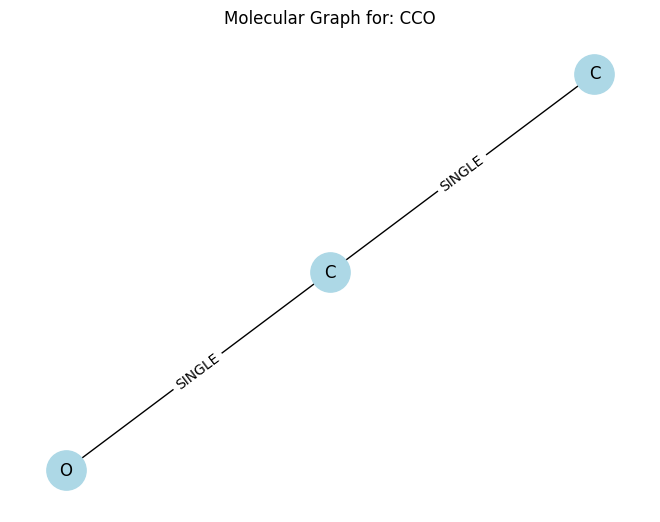

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem

def mol_to_nx(mol):
    """
    Convert an RDKit molecule into a NetworkX graph.

    Nodes: Atoms labeled with their element symbols.
    Edges: Bonds labeled with their bond types.
    """
    G = nx.Graph()

    # Add nodes for each atom
    for atom in mol.GetAtoms():
        idx = atom.GetIdx()
        G.add_node(idx, label=atom.GetSymbol())

    # Add edges for each bond
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtomIdx()
        a2 = bond.GetEndAtomIdx()
        bond_type = str(bond.GetBondType())  # e.g., SINGLE, DOUBLE, etc.
        G.add_edge(a1, a2, label=bond_type)

    return G

def draw_molecule_graph(smiles):
    """
    Create and display a molecular graph from a SMILES string.
    """
    # Parse the SMILES string into a molecule
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        print("Error: Invalid SMILES string!")
        return

    # Convert the molecule to a graph
    G = mol_to_nx(mol)

    # Use a spring layout for visualization
    pos = nx.spring_layout(G)

    # Retrieve labels for nodes and edges
    node_labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')

    # Draw nodes, edges, and labels
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='lightblue', node_size=800)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Molecular Graph for: {smiles}")
    plt.axis("off")
    plt.show()

# Example usage:
# This cell runs the visualization for the ethanol molecule (SMILES: "CCO")
smiles_string = "CCO"
draw_molecule_graph(smiles_string)


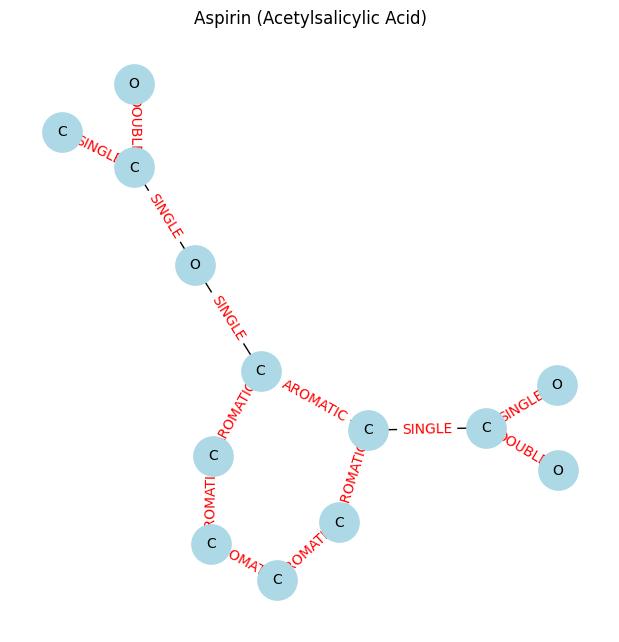

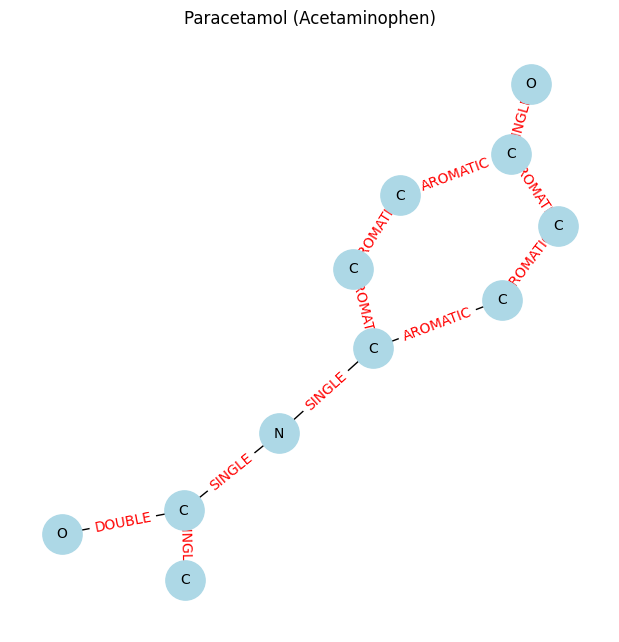

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from rdkit import Chem

def mol_to_nx(mol):
    """
    Convert an RDKit molecule into a NetworkX graph.

    Nodes: Atoms labeled with their element symbols.
    Edges: Bonds labeled with their bond types.
    """
    G = nx.Graph()

    # Add nodes for each atom
    for atom in mol.GetAtoms():
        idx = atom.GetIdx()
        G.add_node(idx, label=atom.GetSymbol())

    # Add edges for each bond
    for bond in mol.GetBonds():
        a1 = bond.GetBeginAtomIdx()
        a2 = bond.GetEndAtomIdx()
        bond_type = str(bond.GetBondType())  # e.g., SINGLE, DOUBLE, etc.
        G.add_edge(a1, a2, label=bond_type)

    return G

def draw_molecule_graph(smiles, title=None):
    """
    Create and display a molecular graph from a SMILES string.
    """
    # Parse the SMILES string into an RDKit molecule
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        print("Error: Invalid SMILES string!")
        return

    # Convert the molecule into a NetworkX graph
    G = mol_to_nx(mol)

    # Compute a layout for the graph
    pos = nx.spring_layout(G)

    # Retrieve labels for nodes and edges
    node_labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'label')

    # Set up the plot
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, labels=node_labels, with_labels=True,
            node_color='lightblue', node_size=800, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Set the title if provided
    if title:
        plt.title(title)
    else:
        plt.title(f"Molecular Graph for: {smiles}")

    plt.axis("off")
    plt.show()

# Define SMILES strings for Aspirin and Paracetamol:
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"         # Aspirin (Acetylsalicylic Acid)
paracetamol_smiles = "CC(=O)NC1=CC=C(C=C1)O"            # Paracetamol (Acetaminophen)

# Draw the molecular graph for Aspirin
draw_molecule_graph(aspirin_smiles, title="Aspirin (Acetylsalicylic Acid)")

# Draw the molecular graph for Paracetamol
draw_molecule_graph(paracetamol_smiles, title="Paracetamol (Acetaminophen)")
